In [14]:
#Inicialmente importamos las librerías que posteriormente utilizaremos

import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as col
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import missingno as msno
import scipy.optimize as sco
import scipy.interpolate as sci
from sklearn.preprocessing import MinMaxScaler
import requests

In [2]:
start = dt.datetime(2000,1,1)
end = dt.datetime.now()

sp500_data = yf.download('^GSPC', start=start, end= end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500m = sp500_data.resample('M').apply(lambda x: x.iloc[-1,])

In [4]:
sp500_var = np.log(sp500m.pct_change())

C:\Users\Renzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
#Chequeamos de wikipedia la lista de activos que compones el SP500

r = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
c = r.content
componentes = pd.read_html(c)[0]


In [6]:
componentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             493 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [7]:
#Vemos los sectores que componen el índice

componentes['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [8]:
start = dt.datetime(2000,1,1)
end = dt.datetime.now()

In [ ]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

El desempeño de cada sector se puede observar a partir de los ETFs de cada sector, siendo estos una canasta de activos que cotiza en bolsa

Los ETFs se encuentran en el link: https://www.etf.com/sections/etf-strategist-corner/sector-sector-sp-500 

In [9]:
etfs = ['XLI','XLV','XLK',
        'XLC','XLP',
        'XLY','XLU','XLF','XLB',
        'XLRE','XLE']

etf_sect = pd.DataFrame({'Sector':componentes['GICS Sector'].unique(),
                          'ETF': etfs})
etf_sect

,Sector,ETF
0,Industrials,XLI
1,Health Care,XLV
2,Information Technology,XLK
3,Communication Services,XLC
4,Consumer Staples,XLP
5,Consumer Discretionary,XLY
6,Utilities,XLU
7,Financials,XLF
8,Materials,XLB
9,Real Estate,XLRE


In [10]:
#Descargamos de yahoo finance info las cotizaciones de dichos ETFs

start = '2000-01-01'
sectores = yf.download(list(etf_sect.ETF.values),start,end)['Adj Close']
sectores


[*********************100%***********************]  11 of 11 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2000-01-03,15.332280,NaN,14.677707,11.641028,18.901943,42.116341,13.171592,NaN,12.086851,21.487965,22.854635
2000-01-04,15.184669,NaN,14.401412,11.132131,18.379751,39.979671,12.800685,NaN,11.722250,21.000351,22.167097
2000-01-05,15.811991,NaN,14.781307,11.044668,18.297831,39.386124,13.026846,NaN,12.018060,20.811956,21.894461
2000-01-06,16.217897,NaN,15.351151,11.529709,18.543579,38.080376,13.271095,NaN,11.997420,20.878456,22.143396
2000-01-07,16.208675,NaN,15.515193,11.720547,19.250092,38.745129,14.112413,NaN,12.100616,21.133333,23.186556
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,81.250000,57.630001,86.279999,33.139999,100.849998,147.110001,76.879997,37.080002,69.970001,135.050003,147.350006
2023-04-25,79.489998,56.730000,84.660004,32.570000,98.989998,143.970001,76.779999,36.740002,69.900002,133.610001,144.429993
2023-04-26,78.550003,56.130001,83.529999,32.259998,97.120003,146.110001,76.180000,36.439999,68.260002,131.710007,143.690002


In [11]:
sectores = sectores.resample('M').apply(lambda x: x.iloc[-1,])


In [12]:

scaler = MinMaxScaler()
scaled = scaler.fit_transform(sectores)
scaled = pd.DataFrame(scaled, columns=sectores.columns,index=sectores.index)
plt.figure(figsize = (20,25))




<Figure size 2000x2500 with 0 Axes>

<Figure size 2000x2500 with 0 Axes>

In [13]:
sectores_rent = np.log1p(sectores.pct_change())
sectores_rent.describe()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
count,279.000000,58.000000,279.000000,279.000000,279.000000,279.000000,279.000000,90.000000,279.000000,279.000000,279.000000
mean,0.006330,0.004014,0.006201,0.003724,0.006183,0.004902,0.006274,0.005077,0.006218,0.006570,0.007058
std,0.059783,0.063192,0.074771,0.063726,0.054960,0.067293,0.035678,0.050057,0.044410,0.041300,0.055182
min,-0.253541,-0.152359,-0.421152,-0.303786,-0.206114,-0.286432,-0.134774,-0.163774,-0.159250,-0.156411,-0.194002
25%,-0.027044,-0.034232,-0.031674,-0.024497,-0.021383,-0.026666,-0.012321,-0.018843,-0.014546,-0.018727,-0.019666
50%,0.009399,0.008392,0.012697,0.009612,0.010039,0.015606,0.009498,0.010208,0.012220,0.010399,0.010474
75%,0.041980,0.037876,0.049542,0.037878,0.038099,0.045687,0.029726,0.031629,0.035615,0.031533,0.042051
max,0.159875,0.137794,0.268224,0.197156,0.166094,0.221282,0.099435,0.102033,0.124113,0.118561,0.172966


In [14]:
#Aquí observamos un ranking de los sectores con mayor Sharpe

comparacion = etf_sect.copy()
# comparacion = comparacion.append({'Sector':'SP500','ETF':'SPY'},ignore_index=True)
# Para ver mejor la información, anualizamos la rentabilidad usando la formula de matematicas financieras ((1+i)^t)-1
comparacion['Rentabilidad'] = ((1+sectores_rent.mean().values)**12)-1 
#Igual para la volatilidad con la formula sigma*raiz(t)
comparacion['Volatilidad'] = sectores_rent.std().values*np.sqrt(12)
comparacion['Sharpe'] = comparacion.Rentabilidad/comparacion.Volatilidad
comparacion.sort_values(['Sharpe'],ascending=False)

,Sector,ETF,Rentabilidad,Volatilidad,Sharpe
6,Utilities,XLU,0.077938,0.123592,0.630606
9,Real Estate,XLRE,0.081753,0.143066,0.571433
8,Materials,XLB,0.077225,0.153842,0.501974
10,Energy,XLE,0.088060,0.191154,0.460676
4,Consumer Staples,XLP,0.076771,0.190387,0.403237
0,Industrials,XLI,0.078665,0.207094,0.379851
7,Financials,XLF,0.062656,0.173403,0.361329
2,Information Technology,XLK,0.077000,0.259016,0.297278
5,Consumer Discretionary,XLY,0.060441,0.233111,0.259279
1,Health Care,XLV,0.049251,0.218905,0.224989


In [15]:
#Decidí tomar todo por una cuestión de curiosidad, por lo que se tendran en cuenta la totalidad de los activos en la recomendación del portfolio. Significando esto que se estudio todo el universo posible para la recomendación, quedando solamente aquellas
# más fiables desde el punto de vista del estudio

gics = list(comparacion.sort_values(['Sharpe'],ascending=False)['Sector'].head(12).values)
gics

['Utilities',
 'Real Estate',
 'Materials',
 'Energy',
 'Consumer Staples',
 'Industrials',
 'Financials',
 'Information Technology',
 'Consumer Discretionary',
 'Health Care',
 'Communication Services']

In [16]:
universo = componentes[componentes['GICS Sector'].isin(gics)][['Symbol','GICS Sector']]
universo.groupby(['GICS Sector']).count()

,Symbol
GICS Sector,
Communication Services,24
Consumer Discretionary,53
Consumer Staples,37
Energy,23
Financials,73
Health Care,65
Industrials,73
Information Technology,66
Materials,29


In [17]:
universo.shape

(503, 2)

In [18]:
#Descargamos datos de todas las acciones del SyP500

universo_data = yf.download(list(universo.Symbol.values),start = '2000-01-01')['Adj Close']

[*********************100%***********************]  503 of 503 completed

6 Failed downloads:
- WMB: No data found for this date range, symbol may be delisted
- LYB: No data found for this date range, symbol may be delisted
- VLO: No data found for this date range, symbol may be delisted
- MTCH: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [19]:
#Corroboramos su shape

universo_data.shape

(5868, 503)

In [20]:
columnas = universo_data.columns

In [21]:
#Eliminamos aquellos stocks que tienen menos de 5 años de cotización

min_values = 1260
n_values = len(universo_data)
for columna in columnas:
    if n_values - universo_data[columna].count() >= min_values:
        universo_data.drop(columna, axis=1, inplace=True)


In [22]:
len(universo_data)

5868

In [23]:
#Acá corroboramos cuantos activos se eliminaron de universo_data a través del dropeo de activos con tiempo de cotización inferior a 5 años

universo_data.shape

(5868, 403)

In [24]:
#msno.bar(universo_data)

In [25]:
universo_data.index = pd.to_datetime(universo_data.index)

In [26]:
universo_data = universo_data.resample('M').apply(lambda x:x.iloc[-1,])
universo_rent = np.log1p(universo_data.pct_change())

In [27]:
#Creamos una tabla rentabilidad, volatilidad, sharpe. Un a vez creada, ordenamos de manera descendente en relación al ratio de Sharpe

acciones = pd.DataFrame({'Symbol':universo_data.columns,
                        'Rentabilidad':((1+universo_rent.mean().values)**12)-1,
                        'Volatilidad':universo_rent.std().values*np.sqrt(12)})

acciones['Sharpe'] = acciones.Rentabilidad/acciones.Volatilidad
acciones.sort_values(['Sharpe'], ascending=False).head(20)                       

,Symbol,Rentabilidad,Volatilidad,Sharpe
42,AZO,0.217827,0.242403,0.898616
245,MNST,0.351145,0.396837,0.884859
280,ORLY,0.234440,0.266153,0.880844
5,ACGL,0.177901,0.202808,0.877190
275,ODFL,0.277454,0.316747,0.875949
369,UNH,0.212234,0.244969,0.866371
72,CHD,0.164218,0.193261,0.849720
385,WEC,0.137756,0.165510,0.832310
319,ROL,0.193840,0.234632,0.826144
328,SHW,0.189674,0.232869,0.814507


In [28]:
#Elijo el top 10p por ratio de Sharpe. Elijo dicho numero ya que en un estudio de posgrado uno de mis profesores citó que a partir de 15 elementos en una canasta de inversión, los efectos de la diversificación se vuelven marginales
top10 = acciones.sort_values(['Sharpe'],ascending=False).head(10)
top10 = pd.merge(top10,universo,on='Symbol',how='inner')
top10

,Symbol,Rentabilidad,Volatilidad,Sharpe,GICS Sector
0,AZO,0.217827,0.242403,0.898616,Consumer Discretionary
1,MNST,0.351145,0.396837,0.884859,Consumer Staples
2,ORLY,0.234440,0.266153,0.880844,Consumer Discretionary
3,ACGL,0.177901,0.202808,0.877190,Financials
4,ODFL,0.277454,0.316747,0.875949,Industrials
5,UNH,0.212234,0.244969,0.866371,Health Care
6,CHD,0.164218,0.193261,0.849720,Consumer Staples
7,WEC,0.137756,0.165510,0.832310,Utilities
8,ROL,0.193840,0.234632,0.826144,Industrials
9,SHW,0.189674,0.232869,0.814507,Materials


In [5]:
#Tomamos los símbolos del top10

# symbols = top10['Symbol']
symbols = ['AAPL','AMZN','GOOGL','META']

In [6]:
import yfinance as yf
#Ahora tomamos los 10 últimos años de las acciones que filtramos por su mejor Sharpe sin tener en cuenta la tasa libre de riesgo. En este caso elegimos los últimos 10 años debido a que quiero armar un portfolio 
# que haga foco en el desempeño de los últimos años, pero teniendo en cuenta un período de cotización no menor a 5 años

canasta = yf.download(symbols,start ='2016-01-01', end = '2017-12-31')['Adj Close']
canasta

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOGL,META
Date,,,,
2016-01-04,24.074738,31.849501,37.972000,102.220001
2016-01-05,23.471443,31.689501,38.076500,102.730003
2016-01-06,23.012117,31.632500,37.966499,102.970001
2016-01-07,22.040895,30.396999,37.049999,97.919998
2016-01-08,22.157448,30.352501,36.545502,97.330002
...,...,...,...,...
2017-12-22,41.540817,58.417999,53.443001,177.199997
2017-12-26,40.486938,58.838001,53.292500,175.990005
2017-12-27,40.494045,59.112999,53.009998,177.619995


In [7]:
#Esto lo usaremos más adelante en el armado de la frontera de eficiencia

noa = len(symbols)

In [8]:
canasta.shape

(503, 4)

In [9]:
canasta.dropna()
canasta.shape

(503, 4)

<Axes: xlabel='Date'>

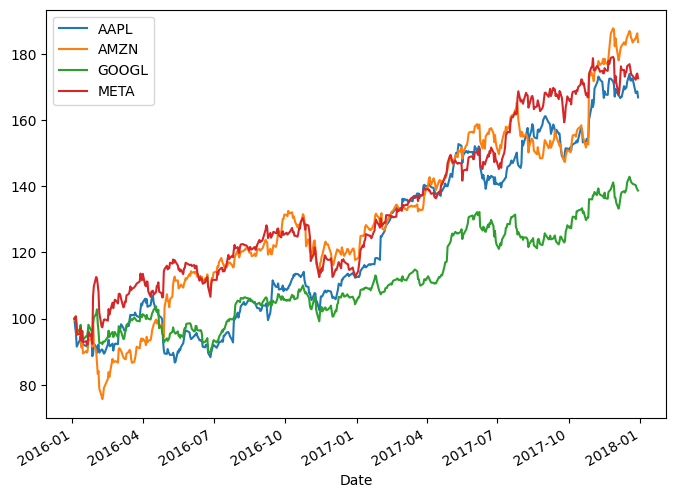

In [10]:
(canasta/canasta.iloc[0]* 100).plot(figsize=(8,6))

In [12]:
import numpy as np
canasta_rent = np.log(canasta/canasta.shift(1))


In [16]:

#Aquí vemos la media anualizada de los retornos

pd.DataFrame.mean(canasta_rent)*252

AAPL     0.256984
AMZN     0.304986
GOOGL    0.164250
META     0.274071
dtype: float64

In [17]:
#Aquí observamos su desviación estándar, mejor conocida como volatilidad

pd.DataFrame.std(canasta_rent)*np.sqrt(252)

AAPL     0.206826
AMZN     0.251579
GOOGL    0.178422
META     0.230361
dtype: float64

In [18]:
canasta_rent.cov(252)

,AAPL,AMZN,GOOGL,META
AAPL,0.000170,0.000086,0.000072,0.000080
AMZN,0.000086,0.000251,0.000110,0.000139
GOOGL,0.000072,0.000110,0.000126,0.000108
META,0.000080,0.000139,0.000108,0.000211


# Efficient Frontier 

In [19]:
prets = []
pvols = []

for p in range(25000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(pd.DataFrame.mean(canasta_rent) * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(canasta_rent.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)
    

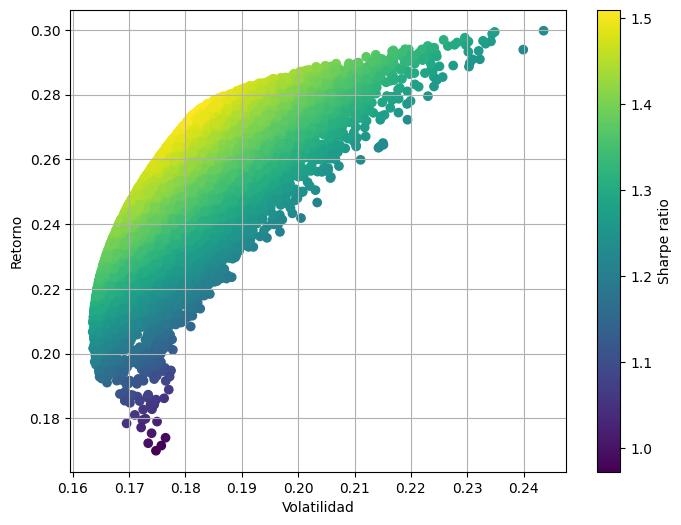

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(pvols, prets, c = prets/pvols, marker = 'o')
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.colorbar(label='Sharpe ratio')
plt.grid(True)

In [21]:
#Creamos una función que nos devuelva los retornos y volatilidades en base a los weights o proporciones

def statistics(weights):
    """Returns portfolio statistics.
    Parameters
    ==========
    weights : array-like
    weights for different securities in portfolio
    Returns
    =======
    pret : float
    expected portfolio return
    pvol : float
    expected portfolio volatility
    pret / pvol : float
    Sharpe ratio for rf=0
    """
    weights = np.array(weights)
    pret = np.sum(canasta_rent.mean() * weights)*252
    pvol = np.sqrt(np.dot(weights.T, np.dot(canasta_rent.cov() * 252, weights)))
    return [pret, pvol,pret/pvol]

In [22]:
#Definimos una función que maximice el Sharpe. El return va en negativo ya que se utilizará la función minimize y al minimizar algo que retorna un negativo estaría maximizando

def min_sharpe(weights):
    return -statistics(weights)[2]

In [23]:

#Ver
cons = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1 })
bnds = tuple((0,1) for x in range(noa))

In [24]:
%%time
opts = sco.minimize(min_sharpe, noa * [1. / noa,], method='SLSQP',
bounds=bnds, constraints=cons)

CPU times: total: 31.2 ms
Wall time: 39 ms


In [25]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.5107767400823826
       x: [ 4.587e-01  2.744e-01  1.056e-16  2.669e-01]
     nit: 4
     jac: [-6.899e-06 -3.089e-04  1.555e-01  3.294e-04]
    nfev: 20
    njev: 4

In [26]:
#Vamos viendo que proporción de cada uno de los elementos nos recomienda en base a maximizar Sharpe

opts['x'].round(5)

array([0.45869, 0.2744 , 0.     , 0.26691])

In [27]:
#Aquí nos devuelve retorno, volatilidad y Sharpe, respectivamente hablando, al maximizar el ratio

statistics(opts['x'].round(5))

[0.27471660764140826, 0.18183799120703104, 1.5107767404262105]

In [28]:
#Creamos una función que minimice la volatilidad

def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [29]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
bounds=bnds, constraints=cons)

In [30]:
optv

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.026745068666373766
       x: [ 3.394e-01  7.968e-03  5.696e-01  8.303e-02]
     nit: 8
     jac: [ 5.337e-02  5.324e-02  5.351e-02  5.384e-02]
    nfev: 40
    njev: 8

In [31]:
#Vamos viendo que proporción de cada uno de los elementos nos recomienda en base a minimizar la volatilidad

optv['x'].round(5)

array([0.33944, 0.00797, 0.56956, 0.08303])

In [32]:
#Aquí nos devuelve retorno, volatilidad y Sharpe, respectivamente hablando, al maximizar el ratio

statistics(optv['x'].round(5))

[0.20596795617325336, 0.16353919190619517, 1.2594409558498676]

In [33]:
cons = ({'type' : 'eq', 'fun' : lambda x: statistics(x)[0] - tret},
       {'type' : 'eq', 'fun' : lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights) 

In [34]:
def min_func_port(weights):
    return statistics(weights)[1]

In [35]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
    bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)    

CPU times: total: 19.9 s
Wall time: 22.9 s


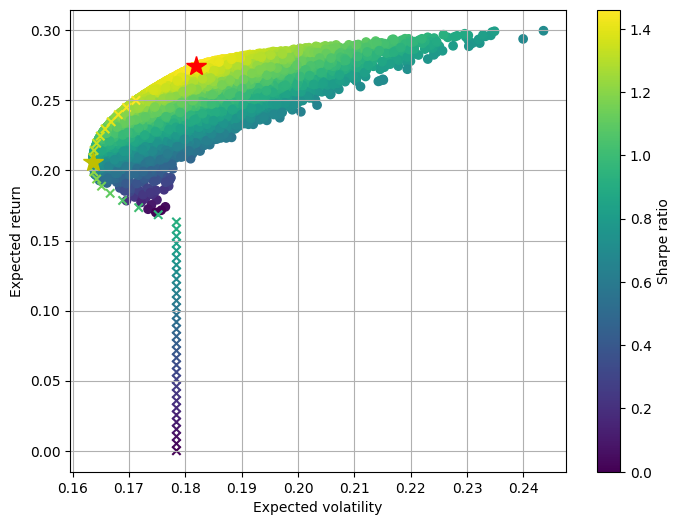

In [36]:
#Corroboramos frontera de eficiencia y portfolio óptimo

plt.figure(figsize=(8,6))
"random portfolios"
plt.scatter(pvols, prets, c = prets / pvols, marker = 'o')
"Efficient frontier"
plt.scatter(tvols, trets, c = trets / tvols, marker = 'x')
"Portfolio with highest sharpe ratio"
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
"Portfolio with the minimum expected volatility"
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label = 'Sharpe ratio')

In [37]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [38]:
tck = sci.splrep(evols, erets)

In [39]:
#Volvemos a crear nuestra frontera de eficiencia pero a través de la interpolación de splines

def f(x):
    "Efficient frontier function(splines interpolation)"
    return sci.splev(x, tck, der = 0)
def df(x):
    "First derivative of efficient frontier function"
    return sci.splev(x, tck, der = 1)

In [41]:
#Generamos la ecuación de la market line, teniendo en cuenta rf = 0

def equations(p, rf=0.0178):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [42]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])
opt

array([0.0178    , 1.22610716, 0.16368363])

In [43]:
np.round(equations(opt),6)

array([ 0.,  0., -0.])

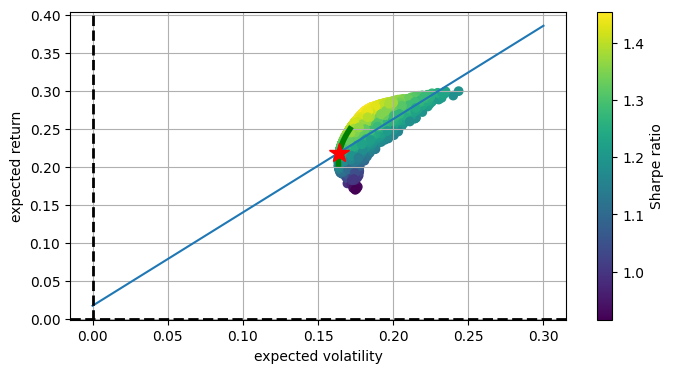

In [44]:

#En este caso nuestro portafolio no se adecua a la market line, en parte porque tuvimos en cuenta una risk free igual a 0, es decir no hay costo al endeudarse ni rentabilidad al invertir en activos libre de riesgo. Esto directamente incentiva en la inversión de
#activos con riesgo, incentivando el apalancamiento. POR LO QUE DICHO PORTFOLIO SOLO ES ÚTIL A FINES EJEMPLIFICATIVOS, NO EN TÉRMINOS REALES

plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
 c=(prets - 0.01) / pvols, marker='o')
 # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
 # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
 # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [45]:
cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - f(opt[2])},
 {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
 bounds=bnds, constraints=cons)

In [46]:
#Esta seria la proporción final de inversión en cada uno de los activos

res['x'].round(3)

array([0.367, 0.052, 0.464, 0.117])

In [47]:
prop = res['x'].round(3)

In [52]:

symbols_arr = symbols.to_numpy().reshape(-1, 1)
result = np.concatenate((symbols_arr, prop.reshape(-1, 1)), axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [49]:
# Y aquí quedaría explicitada con cada símbolo

result

NameError: name 'result' is not defined